                                    TSF 6 & 7
                                    SARIMAX

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
import mplfinance as mpf
%matplotlib inline
import statsmodels.api as sm
import seaborn as sns

import chart_studio.plotly as py
import plotly.express as px
import plotly.graph_objects as go

import cufflinks as cf # Connects Plotly to Pandas
# Makes Plotly work in your Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

import requests # Get URL data
from bs4 import BeautifulSoup # Manipulate URL data
import json
from pandas import DataFrame as df

                    Seasonal Autoregressive Integrated Moving Average
                                        SARIMA
                    
- We were trying to force seasonal data which is why we were getting imperfect results. With SARIMA we use an additional set of parameters that describe seasonal components of our model (P,D,Q)m.

- **P** : Seasonal Regression

- **D** : Differencing

- **Q** : Moving Average

- **m** : Rows in Each Season Cycle
 
- With monthly data with a yearly seasonal cycle m would equal 12.

In [3]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.statespace import mlemodel
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

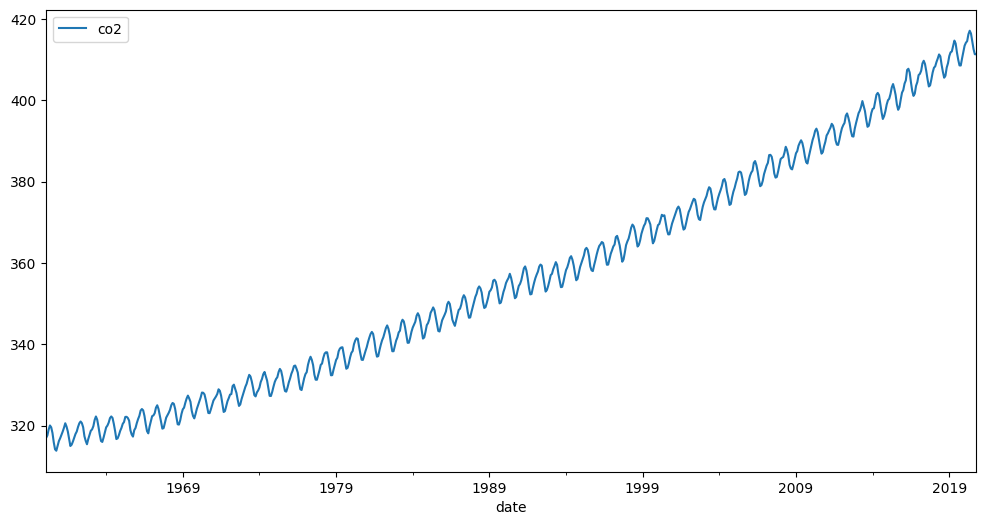

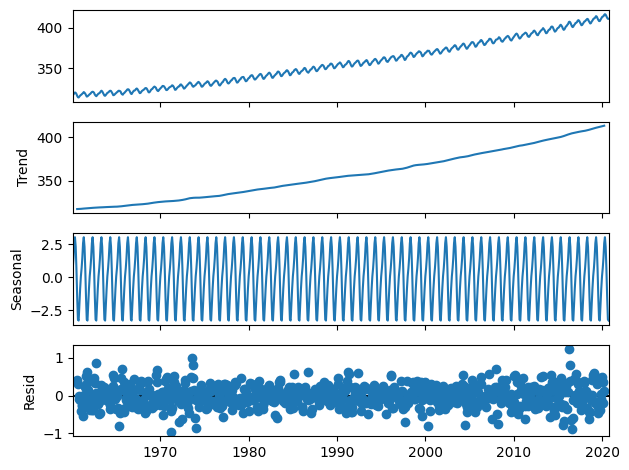

In [4]:
co2_df = pd.read_csv('co2_data.csv', index_col='date', parse_dates=True)

# Monthly global CO2 data since 1960
co2_df = co2_df[co2_df.index>'1960-01-01']
co2_df = co2_df.asfreq('MS')
co2_df = co2_df.fillna(method='ffill')
co2_df.plot(figsize=(12,6))

# We verify that there is a seasonal component
res = seasonal_decompose(co2_df, model='add')
res.plot()
plt.show()

In [11]:
# Run auto_arima as seasonal with m since the season occurs 
# over 12 months
auto_arima(co2_df, seasonal=True, m=12, trace=True, stepwise=False).summary()

 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=2378.581, Time=0.05 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1791.880, Time=0.26 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1491.875, Time=0.62 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.50 sec
 ARIMA(0,1,0)(1,0,2)[12] intercept   : AIC=487.640, Time=3.50 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=1.54 sec
 ARIMA(0,1,0)(2,0,1)[12] intercept   : AIC=502.184, Time=2.04 sec
 ARIMA(0,1,0)(2,0,2)[12] intercept   : AIC=inf, Time=4.00 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1935.543, Time=0.12 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1613.443, Time=0.43 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1414.392, Time=1.18 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=776.334, Time=1.11 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=407.150, Time=2.18 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=444.277, Time=6.01 sec
 ARIMA(0,1,1)(2,0,0)

C:\Users\bhavy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(2,1,1)(1,0,1)[12] intercept (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "C:\Users\bhavy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "C:\Users\bhavy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "C:\Users\bhavy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\pmdarima\arima\ar

 ARIMA(2,1,1)(1,0,1)[12] intercept   : AIC=inf, Time=nan sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=582.264, Time=5.18 sec
 ARIMA(2,1,2)(0,0,0)[12] intercept   : AIC=1445.407, Time=0.62 sec
 ARIMA(2,1,2)(0,0,1)[12] intercept   : AIC=1102.221, Time=2.35 sec
 ARIMA(2,1,2)(1,0,0)[12] intercept   : AIC=757.049, Time=2.10 sec
 ARIMA(2,1,3)(0,0,0)[12] intercept   : AIC=1590.539, Time=0.74 sec
 ARIMA(3,1,0)(0,0,0)[12] intercept   : AIC=1610.752, Time=0.18 sec
 ARIMA(3,1,0)(0,0,1)[12] intercept   : AIC=1424.811, Time=0.60 sec
 ARIMA(3,1,0)(0,0,2)[12] intercept   : AIC=1298.932, Time=1.57 sec
 ARIMA(3,1,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.35 sec
 ARIMA(3,1,0)(1,0,1)[12] intercept   : AIC=428.929, Time=3.05 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=inf, Time=6.05 sec
 ARIMA(3,1,1)(0,0,0)[12] intercept   : AIC=1445.477, Time=0.98 sec
 ARIMA(3,1,1)(0,0,1)[12] intercept   : AIC=1247.485, Time=1.74 sec
 ARIMA(3,1,1)(1,0,0)[12] intercept   : AIC=752.905, Time=2.93 sec
 ARIMA(3,1,2)(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  729
Model:             SARIMAX(0, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -198.575
Date:                            Mon, 29 May 2023   AIC                            407.150
Time:                                    02:05:35   BIC                            430.101
Sample:                                02-01-1960   HQIC                           416.006
                                     - 10-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   4.513e-05      0.000      0.367      0.714      -0.000       0.000
ma.L1         -0.3657      0.033    -11.108      0.000      -0.430      -0.301
ar.S.L12       0.9996      0.000   3296.845      0.000       0.999       1.000
ma.S.L12      -0.8603      0.022    -38.732      0.000      -0.904      -0.817
sigma2         0.0938      0.005     20.283      0.000       0.085       0.103
===================================================================================
Ljung-Box (L1) (Q):                   0.13   Jarque-Bera (JB):                 3.37
Prob(Q):                              0.72   Prob(JB):                         0.19
Heteroskedasticity (H):               1.18   Skew:                            -0.06
Prob(H) (two-sided):                  0.19   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

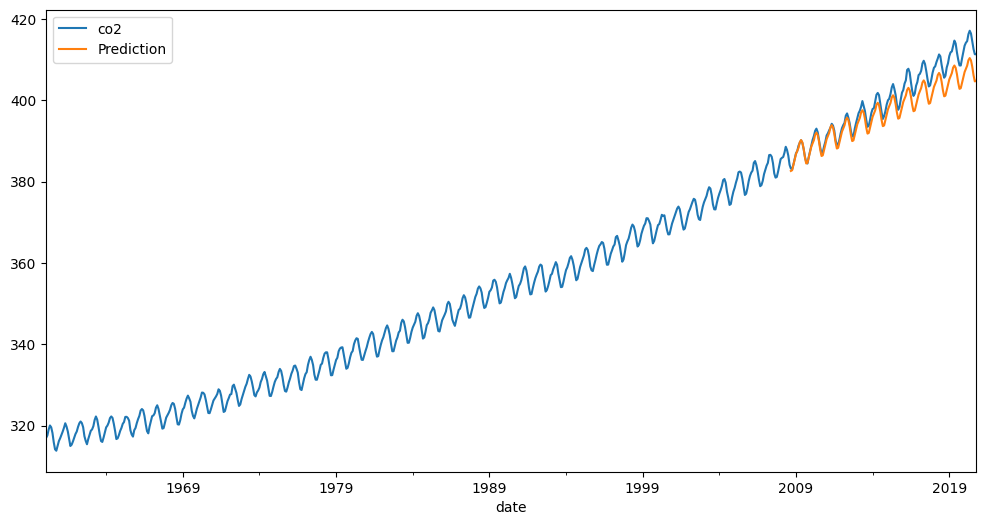

In [27]:
# SARIMAX(0, 1, 1)x(1, 0, 1, 12)

len(co2_df) # 729

train_df = co2_df.iloc[:583] # 80%
test_df = co2_df.iloc[583:] # 20%

# Parameters include the dataset, the 1st order for ARIMA,
# the seasonal order
model = SARIMAX(train_df, order=(0, 1, 1),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
# Get prediction for test set
start = len(train_df)
end = len(train_df) + len(test_df) - 1
# type typ : levels - Predict original endogenous variables
# linear : Linear prediction
prediction = res.predict(start, end).rename('Prediction')

co2_df.plot(legend=True, figsize=(12, 6))
prediction.plot(legend=True)
plt.show()

                                Test Prediction

In [22]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# The prediction is pretty good being that the mean is 356.8 
# and the error was 3.43
co2_df.mean() # 356.8
mean_absolute_error(test_df, prediction) # 2.70
np.sqrt(mean_squared_error(test_df, prediction)) # 3.41

3.4136867918216613

                            Predict the Future

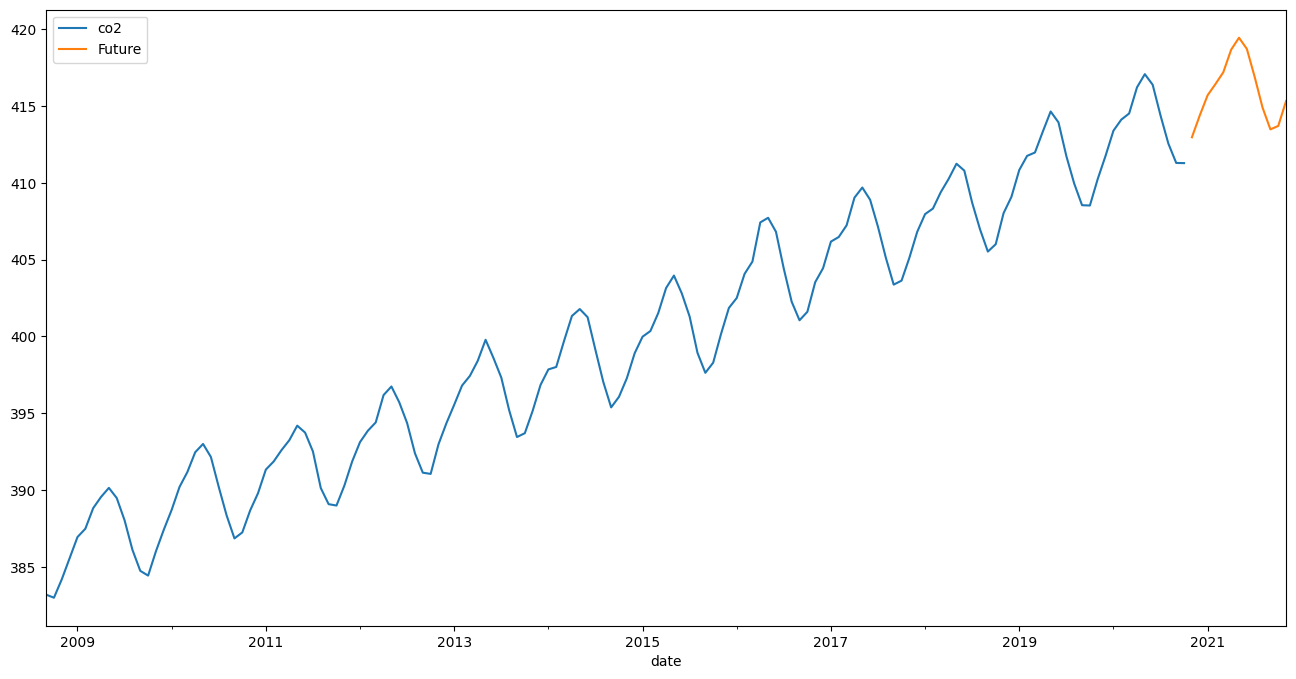

In [28]:
# Predict CO2 levels 1 year into the future
model = SARIMAX(co2_df, order=(0, 1, 1),
               seasonal_order=(1, 0, 1, 12))
res = model.fit()
future = res.predict(len(co2_df), len(co2_df)+12).rename('Future')
test_df.plot(legend=True, figsize=(16,8))
future.plot(legend=True)
plt.show()

                                    TSF 7 

                                    SARIMAX
- SARIMAX supports exogenous regressor variables. Endogenous Variables are dependent on many outside influences. For example the cost of a tomato is based on weather, pests, cost of fuel, etc.

- Exogenous Variables are not effected by outside influences and are fixed in the model. An example of an Exogenous piece of data is used in this video with a holidays effect on the price of oil. A holiday is a unique date, but it happens at exactly the same time, pretty much, every single year.

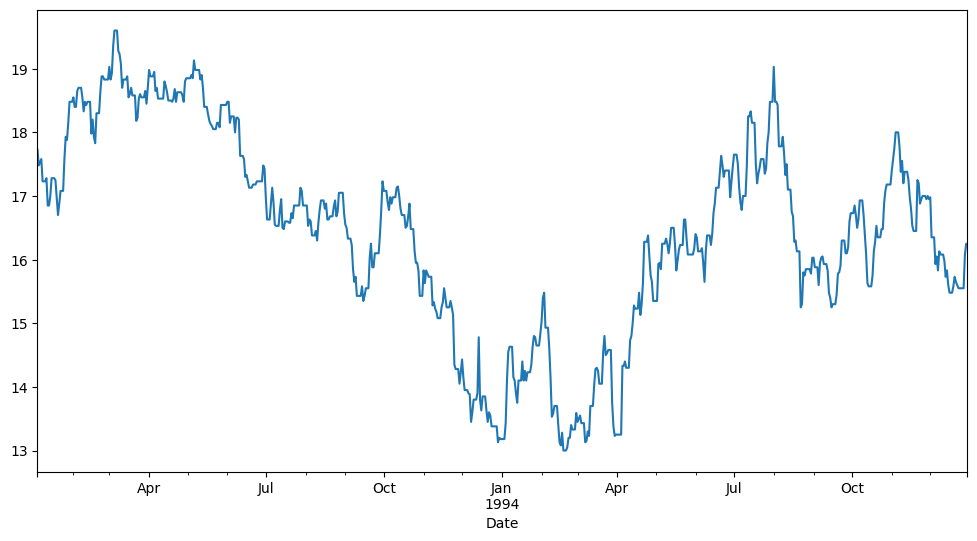

In [52]:
oil_df = pd.read_csv('BrentOilPrices.csv')
oil_df['Date'] = pd.to_datetime(oil_df['Date'], format='mixed')
oil_df.set_index('Date', inplace=True)
oil_df = oil_df[(oil_df.index>'1993-01-01') & (oil_df.index<'1995-01-01')]
oil_df = oil_df.asfreq('d')

oil_df = oil_df.fillna(method='ffill')
# oil_df['Price'].plot(figsize=(16,8))

fig, ax = plt.subplots(figsize=(12, 6))
ax = oil_df['Price'].plot()

Seasonal Component

<Axes: xlabel='Date', ylabel='Resid'>

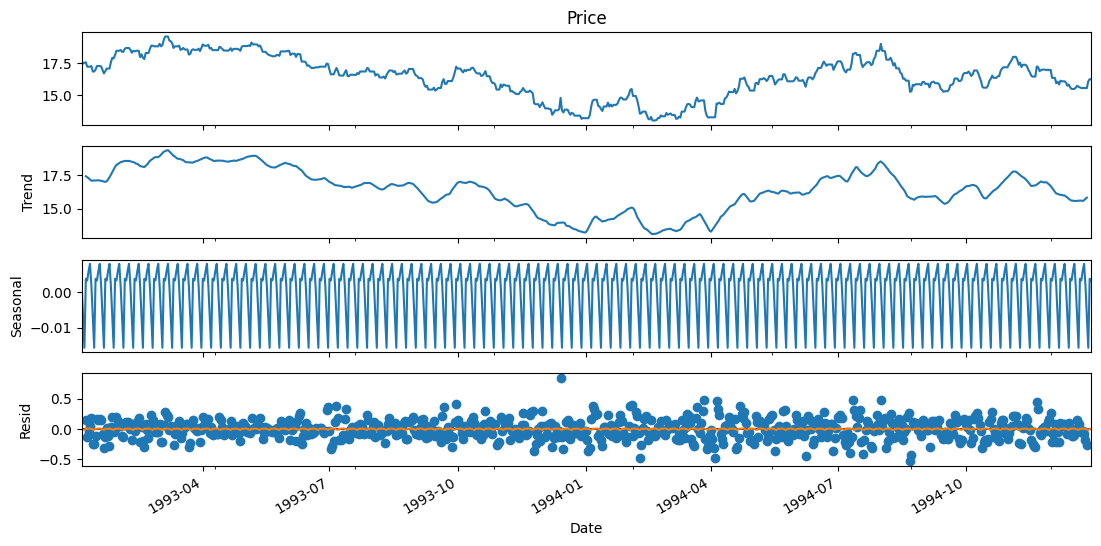

In [59]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima
from statsmodels.tsa.seasonal import seasonal_decompose

# Is there a seasonal component
res = seasonal_decompose(oil_df['Price'])
res.plot()

# Show just the seasonal component
res.seasonal.plot(figsize=(12, 6))

Auto ARIMA

In [61]:
auto_arima(oil_df['Price'], m=7, trace=True, stepwise=False).summary()

 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=-182.933, Time=0.10 sec
 ARIMA(0,1,0)(0,0,1)[7] intercept   : AIC=-186.058, Time=0.23 sec
 ARIMA(0,1,0)(0,0,2)[7] intercept   : AIC=-198.467, Time=0.50 sec
 ARIMA(0,1,0)(1,0,0)[7] intercept   : AIC=-184.496, Time=0.15 sec
 ARIMA(0,1,0)(1,0,1)[7] intercept   : AIC=-194.078, Time=0.69 sec
 ARIMA(0,1,0)(1,0,2)[7] intercept   : AIC=-196.951, Time=0.79 sec
 ARIMA(0,1,0)(2,0,0)[7] intercept   : AIC=-199.334, Time=0.34 sec
 ARIMA(0,1,0)(2,0,1)[7] intercept   : AIC=-198.576, Time=0.83 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=-198.322, Time=1.03 sec
 ARIMA(0,1,1)(0,0,0)[7] intercept   : AIC=-188.961, Time=0.09 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=-191.586, Time=0.25 sec
 ARIMA(0,1,1)(0,0,2)[7] intercept   : AIC=-203.904, Time=0.90 sec
 ARIMA(0,1,1)(1,0,0)[7] intercept   : AIC=-190.202, Time=0.20 sec
 ARIMA(0,1,1)(1,0,1)[7] intercept   : AIC=-200.746, Time=0.80 sec
 ARIMA(0,1,1)(1,0,2)[7] intercept   : AIC=-202.725, Time=1.16 sec
 ARIMA(0,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                  726
Model:             SARIMAX(1, 1, 1)x(2, 0, [], 7)   Log Likelihood                 109.477
Date:                            Mon, 29 May 2023   AIC                           -206.954
Time:                                    02:48:43   BIC                           -179.437
Sample:                                01-04-1993   HQIC                          -196.335
                                     - 12-30-1994                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0041      0.013     -0.315      0.753      -0.030       0.022
ar.L1         -0.5592      0.193     -2.903      0.004      -0.937      -0.182
ma.L1          0.6647      0.179      3.717      0.000       0.314       1.015
ar.S.L7       -0.0856      0.032     -2.661      0.008      -0.149      -0.023
ar.S.L14      -0.1494      0.031     -4.839      0.000      -0.210      -0.089
sigma2         0.0433      0.001     29.863      0.000       0.040       0.046
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               356.51
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               1.67   Skew:                            -0.08
Prob(H) (two-sided):                  0.00   Kurtosis:                         6.43
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

                                Make Predictions

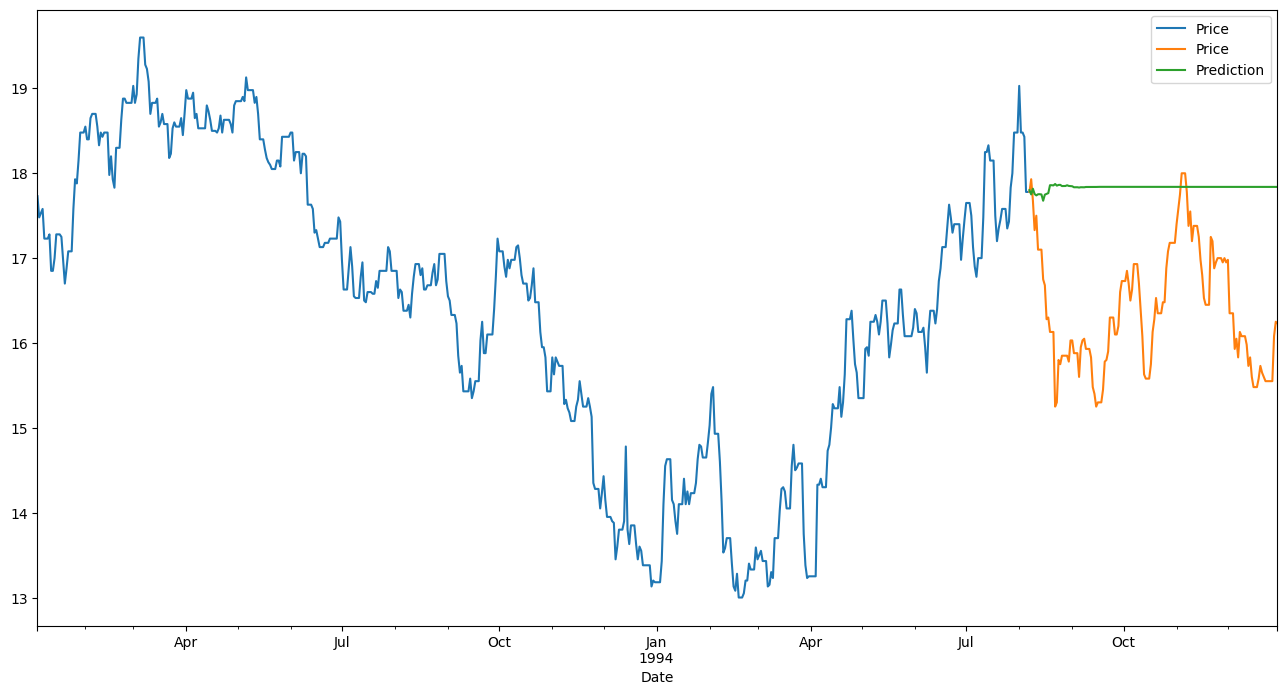

In [68]:
# SARIMAX(1, 1, 1)x(2, 0, [], 7)	

len(oil_df) # 726
train_df = oil_df.iloc[:580] # 80%
test_df = oil_df.iloc[580:]

mod = SARIMAX(train_df['Price'], order=(1, 1, 1), seasonal_order=(2, 0, 0, 7))
res = mod.fit()

start = len(train_df)
end = len(train_df) + len(test_df) - 1
prediction = res.predict(start, end).rename('Prediction')

ax = train_df['Price'].plot(legend=True, figsize=(16, 8))
test_df['Price'].plot(legend=True)
prediction.plot(legend=True)    
plt.show()

Does Adding Holiday Data Help?

In [ ]:
# # We must know when holidays will fall into the future because we can't
# # predict the future prices and the holidays
# # How did we perform and does adding holiday data improve it?
# rmse(test_df['price'], prediction)

# # Train now with the holiday data
# auto_arima(oil_df['price'], exogenous=oil_df[['holiday']], seasonal=True, 
#           m=7, trace=True).summary()

In [ ]:
# # We can tell it to train and to distort the prediction using holiday data
# mod = SARIMAX(train_df['price'], exog=train_df[['holiday']],
#              order=(1,1,1), seasonal_order=(2,0,0,7))
# res = mod.fit()
# start = len(train_df)
# end = len(train_df) + len(test_df) - 1
# prediction = res.predict(start, end, exog=test_df[['holiday']]).rename('Prediction')

# # As you can see from the plot that holiday has nothing to do with the price of oil
# ax = test_df['price'].plot(legend=True, figsize=(16,8))
# prediction.plot(legend=True)